In [2]:
from tensorflow.compat.v2.keras.models import model_from_json

# json 파일 열기
json_file = open('CNN_dog_cat_model.json','r')
loaded_model_json = json_file.read()
json_file.close()

# json 파일로부터 model 로드하기
loaded_model = model_from_json(loaded_model_json)

# 로드한 model에 weight 로드하기
loaded_model.load_weights('CNN_dog_cat_model.h5')

In [1]:
# 종 분류 모델 가져오기
from tensorflow.compat.v2.keras.models import model_from_json

# json 파일 열기
json_file = open('CNN_dog_and_cat_breed_model.json','r')
loaded_model_json = json_file.read()
json_file.close()

# json 파일로부터 model 로드하기
loaded_model = model_from_json(loaded_model_json)

# 로드한 model에 weight 로드하기
loaded_model.load_weights('CNN_dog_and_cat_breed_model.h5')

In [2]:
# 모델 컴파일
loaded_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# 모델 요약
loaded_model.summary()

# # 모델 evaluation
# test_loss, test_acc = loaded_model.evaluate(test_X,test_y)
# print('Accuracy : {} %'.format(test_acc*100))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [3]:
# 필요한 패키지 import
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [4]:
# 글로벌 변수 선언
FAST_RUN = False
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH,IMAGE_HEIGHT)
IMAGE_CHANNELS = 3 # 컬러 사진이므로 채널이 3(rgb)
batch_size = 15

In [5]:
file_dir = './cats/'
# Test를 해보장
test_filenames = os.listdir(file_dir)
test_df = pd.DataFrame({
    'filename':test_filenames
})
nb_samples = test_df.shape[0]

test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    file_dir,
    x_col='filename',
    y_col=None,
    target_size=IMAGE_SIZE,
    class_mode=None,
    batch_size=batch_size,
    shuffle=False
)

# 모델 예측
predict = loaded_model.predict_generator(test_generator,steps=np.ceil(nb_samples/batch_size))


Found 7390 validated image filenames.
Instructions for updating:
Please use Model.predict, which supports generators.


/home/team2/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 3 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


               filename
0   Egyptian_Mau_96.jpg
1  japanese_chin_59.jpg
2      keeshond_162.jpg
3            pug_93.jpg
4    Maine_Coon_144.jpg


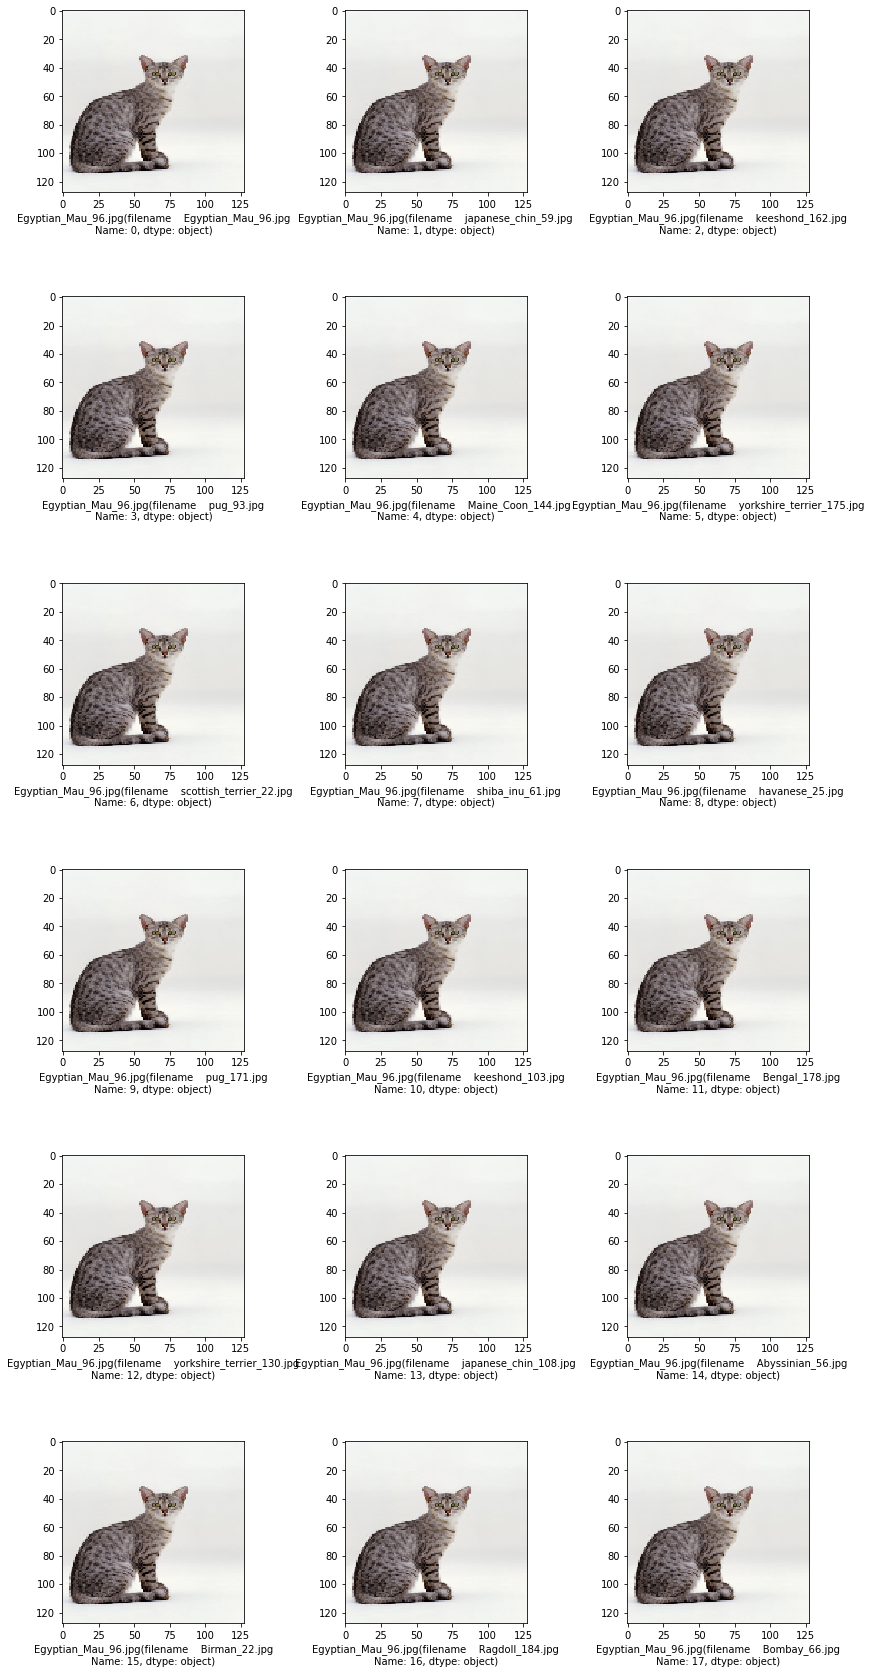

In [21]:
# 평가 생성
# 확률이 큰 걸로 라벨을 붙여준다
# test_df['category'] = np.argmax(predict,axis=39)

# 레이블 변환
# 평가를 위해서 dog,cat으로 있던걸 다시 1,0으로 변환
# print(test_df['category'])
# test_df['category'] = test_df['category'].replace({'dog':1,'cat':0})
reverse_answer = {0: 'Egyptian_Mau', 1: 'japanese_chin', 2: 'keeshond', 3: 'pug', 4: 'Maine_Coon', 5: 'yorkshire_terrier', 6: 'scottish_terrier', 7: 'shiba_inu', 8: 'havanese', 9: 'Bengal', 10: 'Abyssinian', 11: 'Birman', 12: 'Ragdoll', 13: 'Bombay', 14: 'samoyed', 15: 'german_shorthaired', 16: 'english_cocker_spaniel', 17: 'boxer', 18: 'Siamese', 19: 'american_bulldog', 20: 'British_Shorthair', 21: 'english_setter', 22: 'pomeranian', 23: 'basset_hound', 24: 'wheaten_terrier', 25: 'Russian_Blue', 26: 'beagle', 27: 'american_pit_bull_terrier', 28: 'newfoundland', 29: 'Sphynx', 30: 'staffordshire_bull_terrier', 31: 'miniature_pinscher', 32: 'saint_bernard', 33: 'Persian', 34: 'chihuahua', 35: 'great_pyrenees', 36: 'leonberger', 37: 'Abyssinian_101.mat_', 38: 'Abyssinian_102.mat_', 39: 'Abyssinian_100.mat_'}
# 정답 확인!
# 강아지는 1 고양이는 0 이다
sample_test = test_df.head(18)
print(sample_test.head())
plt.figure(figsize=(12,24))
for index, row in sample_test.iterrows():
#     filename = row['filename']
#     category = row['category']
#     print(category,test_df['category'])
    img = load_img(file_dir+filename,target_size=IMAGE_SIZE)
    plt.subplot(6,3,index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + '{}'.format(row) + ')')
plt.tight_layout()
plt.show()